Import potřebných knihoven.

In [13]:
from pytworkpy import visual, network
import torch
import torchvision

Vytvoření instancí potřebnych tříd. Network pro samotnou práci se sítí. Vstupní parametr v jejím konstruktoru je cesta k potřebným datům.

In [14]:
net_shape = {'con1': (1, 6, 5), 'pool': (2, 2), 'con2': (6, 16, 5), 'lin1': (4*4*16, 256), 'lin2': (256, 120), 'lin3': (120, 10)}
model = network.SimpleMNISTClassifier(net_shape)
optimizer = torch.optim.SGD(model.parameters(),lr=0.01, momentum=0.1)
loss_fn = torch.nn.CrossEntropyLoss()

net = network.Network("./data", model=model, optimizer=optimizer, loss_fn=loss_fn)

Volání funkce, která trénuje neuronovou síť uvnitř 'Network'. Funkce vrací typle průběhů chybové funkce při trénování a testování.

In [15]:
loss_graph = net.train_network(epochs=5)

EPOCH: 1
0.66 % done. Last loss: 2.316248655319214
7.33 % done. Last loss: 1.2989375591278076
13.99 % done. Last loss: 0.0876532793045044
20.66 % done. Last loss: 0.025113210082054138
27.33 % done. Last loss: 0.1009402871131897
33.99 % done. Last loss: 0.0031903786584734917
40.66 % done. Last loss: 0.37056028842926025
47.33 % done. Last loss: 0.004592645913362503
53.99 % done. Last loss: 0.004193725064396858
60.66 % done. Last loss: 0.866520881652832
67.33 % done. Last loss: 9.791448246687651e-05
73.99 % done. Last loss: 0.05251674726605415
80.66 % done. Last loss: 1.075061321258545
87.33 % done. Last loss: 0.13330583274364471
93.99 % done. Last loss: 0.0014427622081711888
EPOCH: 2
0.66 % done. Last loss: 0.0019814535044133663
7.33 % done. Last loss: 0.43286192417144775
13.99 % done. Last loss: 0.0003863177262246609
20.66 % done. Last loss: 0.0002751059946604073
27.33 % done. Last loss: 0.004493670538067818
33.99 % done. Last loss: 0.0009700867813080549
40.66 % done. Last loss: 0.00036

Nyní vykreslíme průběh chyby při trénování pomocí modulu visual.

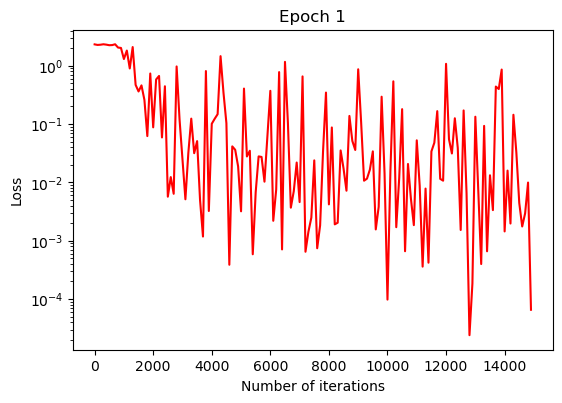

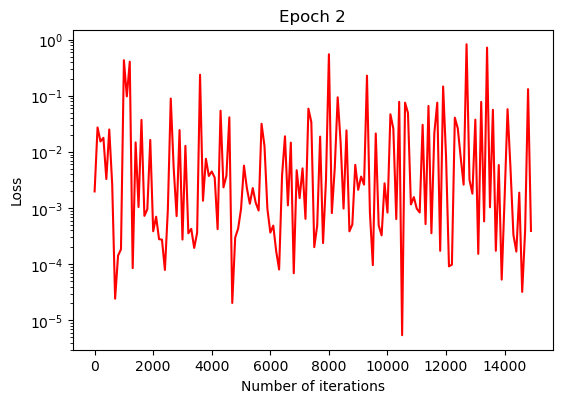

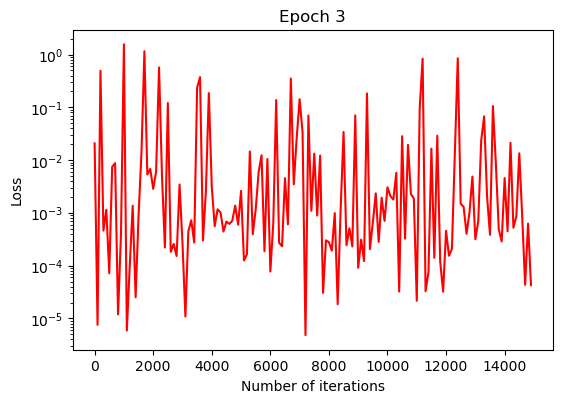

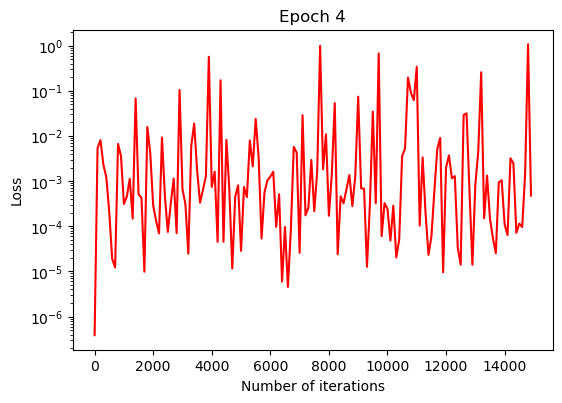

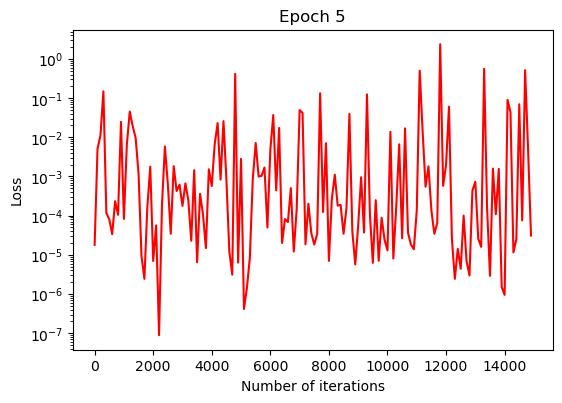

In [16]:
training_loss = loss_graph

vc = visual.Visual((6,4), 'red', (0.1, 0.1, 0.8, 0.8))

vc.plot_loss_per_epoch(training_loss)

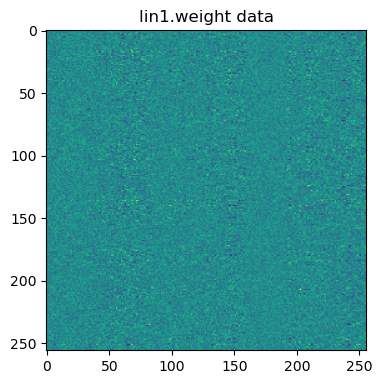

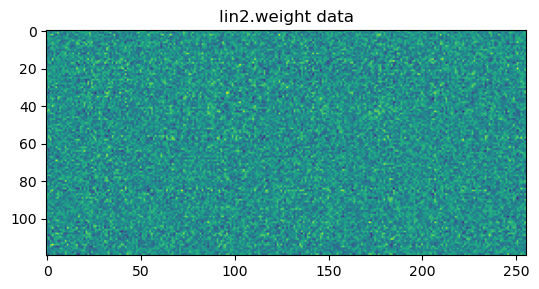

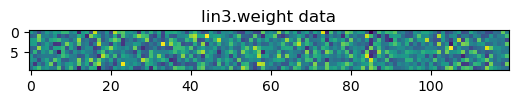

In [23]:
vc.plot_model_lin_weights(net.model)

Otestujeme, jestli natrénovaná neuronová síť umí rozpoznat číslici v 'test.png'.

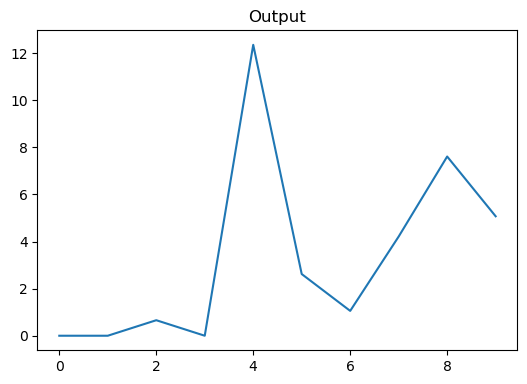

In [26]:
out = net.mnist_digit_classify("test.png")
vc.plot_output(out)

Testování na separátních datech...

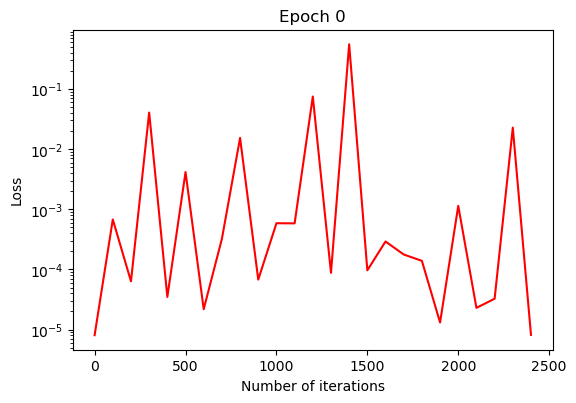

In [27]:
test_loss = net.test_network()

vc.plot_loss(0, test_loss)

Uložíme momentální stav parametrů neuronové sítě do hdf5 souboru...

In [28]:
net.save_as_h5("mnist_model.h5")

... a vytvoříme novou neuronovou síť, do které už data jenom načteme.

In [29]:
model2 = network.SimpleMNISTClassifier(net_shape)
net2 = network.Network("./data", model2, optimizer, loss_fn)
net2.load_from_h5("mnist_model.h5")

Vidíme, že načtená neuronová síť dává stejný výsledek jako ta předchozí.

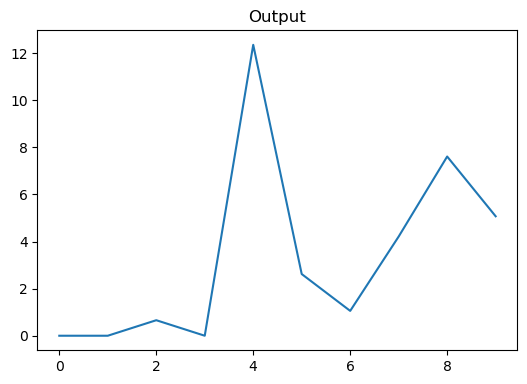

In [30]:
out = net2.mnist_digit_classify("test.png")
vc.plot_output(out)